<a href="https://www.kaggle.com/code/zainabsb/gender-emotional-recognition?scriptVersionId=117168636" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <center>Emotional Speech Recognition
* Emotional speech recognition aims at automatically identifying the emotional or physical state of a human being from his or her voice. The emotional and physical states of a speaker are known as emotional aspects of speech and are included in the so-called paralinguistic aspects.
    
* In this code I benefited from previous codes and summed them in this complete code testing audios of both genders to get their emotions 
    
* I used CNN to apply my tests.

# <center>Libraries

In [1]:
import os

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# librosa is a Python library for analyzing audio and music.
# It can be used to extract the data from the audio files we will see it later
import librosa 
import librosa.display

# to play the audio files
from IPython.display import Audio
plt.style.use('seaborn-white')

**As feature extraction takes time, it is better to specify the data frames available with their paths**

In [2]:
DATA_FRAMES = True
fem_path = '../input/features/Female_features.csv'
mal_path = '../input/features/Male_features.csv'

# <center> Datasets

In [3]:
TESS = "../input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/"
RAV = "../input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/"
SAVEE = "../input/surrey-audiovisual-expressed-emotion-savee/ALL/"
CREMA = "../input/cremad/AudioWAV/"

In [4]:
# Get the data location for SAVEE
dir_list = os.listdir(SAVEE)

# parse the filename to get the emotions
emotion=[]
path = []
for i in dir_list:
    if i[-8:-6]=='_a':
        emotion.append('angry')
    elif i[-8:-6]=='_d':
        emotion.append('disgust')
    elif i[-8:-6]=='_f':
        emotion.append('fear')
    elif i[-8:-6]=='_h':
        emotion.append('happy')
    elif i[-8:-6]=='_n':
        emotion.append('neutral')
    elif i[-8:-6]=='sa':
        emotion.append('sad')
    elif i[-8:-6]=='su':
        emotion.append('surprise')
    else:
        emotion.append('unknown') 
    path.append(SAVEE + i)

# Now check out the label count distribution 
SAVEE_df = pd.DataFrame(emotion, columns = ['labels'])
SAVEE_df = pd.concat([SAVEE_df, pd.DataFrame(path, columns = ['path'])], axis = 1)
print('SAVEE dataset')
SAVEE_df.head()

SAVEE dataset


labels                                               path
0    happy  ../input/surrey-audiovisual-expressed-emotion-...
1     fear  ../input/surrey-audiovisual-expressed-emotion-...
2    happy  ../input/surrey-audiovisual-expressed-emotion-...
3  disgust  ../input/surrey-audiovisual-expressed-emotion-...
4    angry  ../input/surrey-audiovisual-expressed-emotion-...

In [5]:
# Get the data location for TESS
path = []
emotion = []
dir_list = os.listdir(TESS)

for i in dir_list:
    fname = os.listdir(TESS + i)   
    for f in fname:
        if i == 'OAF_angry' or i == 'YAF_angry':
            emotion.append('angry')
        elif i == 'OAF_disgust' or i == 'YAF_disgust':
            emotion.append('disgust')
        elif i == 'OAF_Fear' or i == 'YAF_fear':
            emotion.append('fear')
        elif i == 'OAF_happy' or i == 'YAF_happy':
            emotion.append('happy')
        elif i == 'OAF_neutral' or i == 'YAF_neutral':
            emotion.append('neutral')                                
        elif i == 'OAF_Pleasant_surprise' or i == 'YAF_pleasant_surprised':
            emotion.append('surprise')               
        elif i == 'OAF_Sad' or i == 'YAF_sad':
            emotion.append('sad')
        else:
            emotion.append('Unknown')
        path.append(TESS + i + "/" + f)

TESS_df = pd.DataFrame(emotion, columns = ['labels'])
#TESS_df['source'] = 'TESS'
TESS_df = pd.concat([TESS_df,pd.DataFrame(path, columns = ['path'])],axis=1)
print('TESS dataset')
TESS_df.head()

TESS dataset


labels                                               path
0   fear  ../input/toronto-emotional-speech-set-tess/tes...
1   fear  ../input/toronto-emotional-speech-set-tess/tes...
2   fear  ../input/toronto-emotional-speech-set-tess/tes...
3   fear  ../input/toronto-emotional-speech-set-tess/tes...
4   fear  ../input/toronto-emotional-speech-set-tess/tes...

In [6]:
# Importing datas from RAVDESS
dir = os.listdir(RAV)

males = []
females = [] 
        
for actor in dir:
       
    files = os.listdir(RAV + actor)
        
    for file in files: 
        part = file.split('.')[0]
        part = part.split("-")           
            
        temp = int(part[6])        
                
        if part[2] == '01':
            emotion = 'neutral'
        elif part[2] == '02':
            emotion = 'calm'
        elif part[2] == '03':
            emotion = 'happy'
        elif part[2] == '04':
            emotion = 'sad'
        elif part[2] == '05':
            emotion = 'angry'
        elif part[2] == '06':
            emotion = 'fear'
        elif part[2] == '07':
            emotion = 'disgust'
        elif part[2] == '08':
            emotion = 'surprise'
        else:
            emotion = 'unknown'
            
        if temp%2 == 0:
            path = (RAV + actor + '/' + file)
            #emotion = 'female_'+emotion
            females.append([emotion, path]) 
        else:
            path = (RAV + actor + '/' + file)
             #emotion = 'male_'+emotion
            males.append([emotion, path])   
    
   
RavFemales_df = pd.DataFrame(females)
RavFemales_df.columns = ['labels', 'path']

RavMales_df = pd.DataFrame(males)
RavMales_df.columns = ['labels', 'path']

print('RAVDESS datasets')
RavFemales_df.head()

RAVDESS datasets


labels                                               path
0  surprise  ../input/ravdess-emotional-speech-audio/audio_...
1   neutral  ../input/ravdess-emotional-speech-audio/audio_...
2   disgust  ../input/ravdess-emotional-speech-audio/audio_...
3   disgust  ../input/ravdess-emotional-speech-audio/audio_...
4   neutral  ../input/ravdess-emotional-speech-audio/audio_...

In [7]:
RavMales_df.head()

labels                                               path
0     calm  ../input/ravdess-emotional-speech-audio/audio_...
1    angry  ../input/ravdess-emotional-speech-audio/audio_...
2    happy  ../input/ravdess-emotional-speech-audio/audio_...
3     calm  ../input/ravdess-emotional-speech-audio/audio_...
4  disgust  ../input/ravdess-emotional-speech-audio/audio_...

In [8]:
files = os.listdir(CREMA)

female = [1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,1024,1025,1028,1029,1030,1037,1043,1046,1047,1049,
          1052,1053,1054,1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,1082,1084,1089,1091]
males = []
females = []

for file in files: 
    part = file.split('_')   
    
    if part[2] == 'SAD':
        emotion = 'sad'
    elif part[2] == 'ANG':
        emotion = 'angry'
    elif part[2] == 'DIS':
        emotion = 'disgust'
    elif part[2] == 'FEA':
        emotion = 'fear'
    elif part[2] == 'HAP':
        emotion = 'happy'
    elif part[2] == 'NEU':
        emotion = 'neutral'  
    else:
        emotion = 'unknown'
        
    if int(part[0]) in female:
        path = (CREMA + '/' + file)
        #emotion = 'female_'+emotion
        females.append([emotion, path]) 
    else:
        path = (CREMA + '/' + file)
        #emotion = 'male_'+emotion
        males.append([emotion, path])   
    
CremaFemales_df = pd.DataFrame(females)
CremaFemales_df.columns = ['labels', 'path']

CremaMales_df = pd.DataFrame(males)
CremaMales_df.columns = ['labels', 'path']
    
print('CREMA datasets')
CremaFemales_df.head()

CREMA datasets


labels                                           path
0  disgust  ../input/cremad/AudioWAV//1028_TSI_DIS_XX.wav
1    happy  ../input/cremad/AudioWAV//1075_IEO_HAP_LO.wav
2    happy  ../input/cremad/AudioWAV//1084_ITS_HAP_XX.wav
3      sad  ../input/cremad/AudioWAV//1004_WSI_SAD_XX.wav
4    happy  ../input/cremad/AudioWAV//1030_DFA_HAP_XX.wav

In [9]:
CremaMales_df.head()

labels                                           path
0  disgust  ../input/cremad/AudioWAV//1067_IWW_DIS_XX.wav
1  disgust  ../input/cremad/AudioWAV//1066_TIE_DIS_XX.wav
2  disgust  ../input/cremad/AudioWAV//1027_DFA_DIS_XX.wav
3    happy  ../input/cremad/AudioWAV//1032_IEO_HAP_HI.wav
4      sad  ../input/cremad/AudioWAV//1023_TIE_SAD_XX.wav

In [10]:
# Now lets merge all the dataframe
Males = pd.concat([SAVEE_df, RavMales_df, CremaMales_df], axis = 0)
Males.to_csv("males_emotions_df.csv", index = False)

Females = pd.concat([TESS_df, RavFemales_df, CremaFemales_df], axis = 0)
Females.to_csv("females_emotions_df.csv", index = False)

# <center> Data Visualization

**In this code, eight emotions are maintained. I will create a histogram showing the count of each emotion for each gender. Then using Librosa Library, some wave plots and spectrograms will be done for specific emotions.**

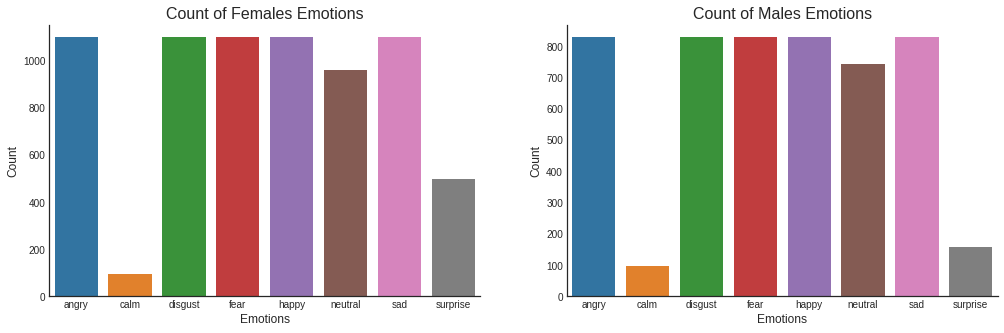

In [11]:
order = ['angry','calm','disgust','fear','happy','neutral','sad','surprise']

fig = plt.figure(figsize=(17, 5))

fig.add_subplot(121)
plt.title('Count of Females Emotions', size=16)
sns.countplot(Females.labels, order = order)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)

fig.add_subplot(122)
plt.title('Count of Males Emotions', size=16)
sns.countplot(Males.labels, order = order)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)

plt.show()

In [12]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title(f'Waveplot for audio with {e} emotion', size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()
    
def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

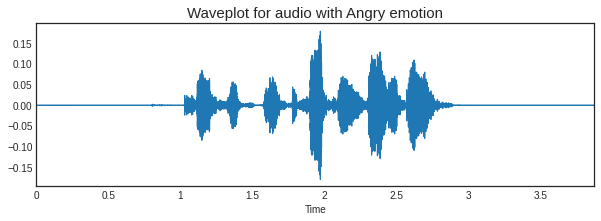

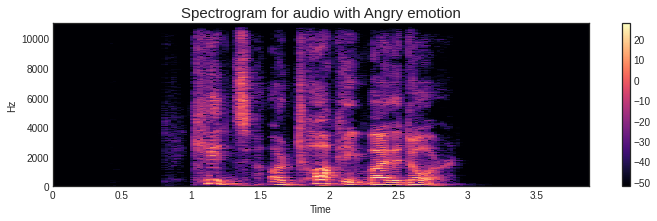

In [13]:
emotion='Angry'
path = '../input/ravdess-emotional-speech-audio/Actor_01/03-01-05-01-01-01-01.wav'
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

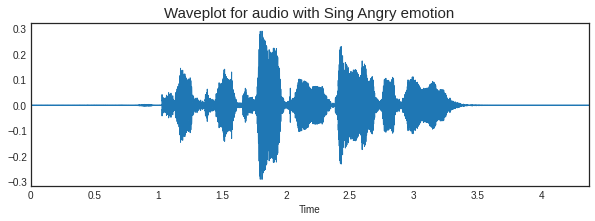

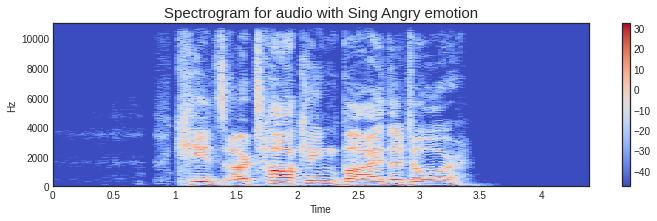

In [14]:
emotion='Sing Angry'
path = '../input/ravdess-emotional-song-audio/Actor_01/03-02-05-01-01-01-01.wav'
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

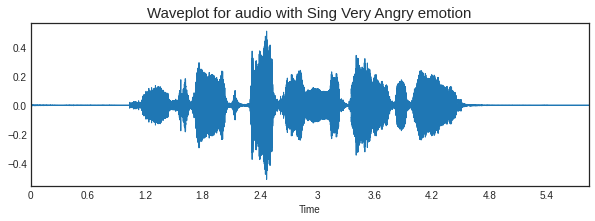

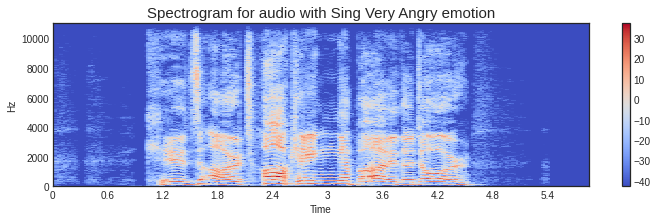

In [15]:
emotion='Sing Very Angry' 
path = '../input/ravdess-emotional-song-audio/Actor_01/03-02-05-02-01-01-01.wav'
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

# <center>Adding augmentation

Definition:
* Data augmentation is the process by which we create new synthetic training samples by adding small perturbations on our initial training set.
* The objective is to make our model invariant to those perturbations and enhace its ability to generalize.
* In order to this to work adding the perturbations must conserve the same label as the original training sample.
* In images data augmention can be performed by shifting the image, zooming, rotating ...
* In our case we will add noise, stretch and roll, pitch shift ...

In [16]:
def noise(data):
    noise_amp = 0.04*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.70):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.8):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

def higher_speed(data, speed_factor = 1.25):
    return librosa.effects.time_stretch(data, speed_factor)

def lower_speed(data, speed_factor = 0.75):
    return librosa.effects.time_stretch(data, speed_factor)

# taking any example and checking for techniques.
path = path = '../input/ravdess-emotional-speech-audio/Actor_01/03-01-05-01-01-01-01.wav'
data, sample_rate = librosa.load(path)

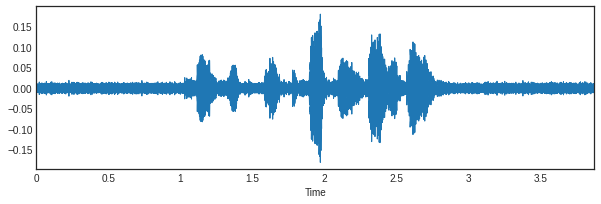

In [17]:
plt.figure(figsize=(10,3))
x = noise(data)
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

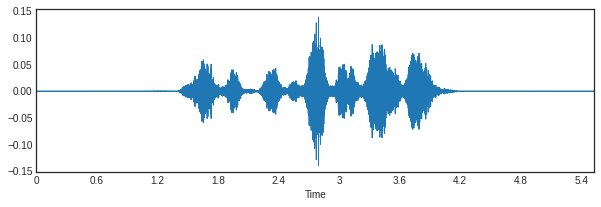

In [18]:
plt.figure(figsize=(10,3))
x = stretch(data)
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

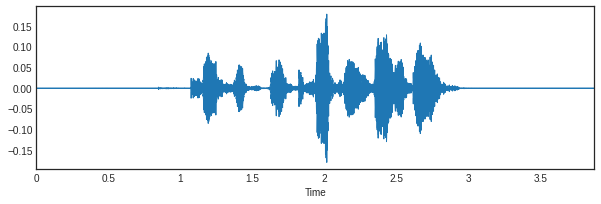

In [19]:
plt.figure(figsize=(10,3))
x = shift(data)
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

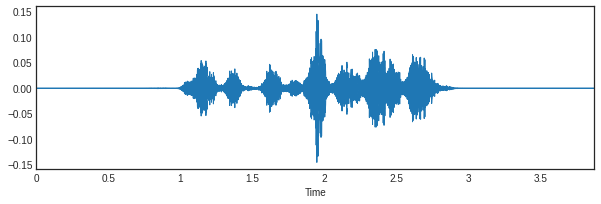

In [20]:
plt.figure(figsize=(10,3))
x = pitch(data, sample_rate)
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

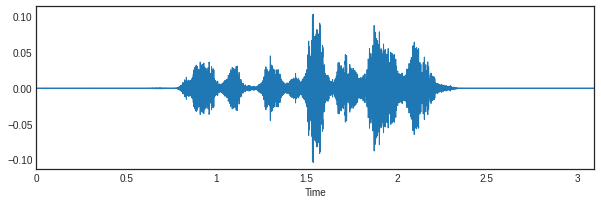

In [21]:
plt.figure(figsize=(10,3))
x = higher_speed(data)
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

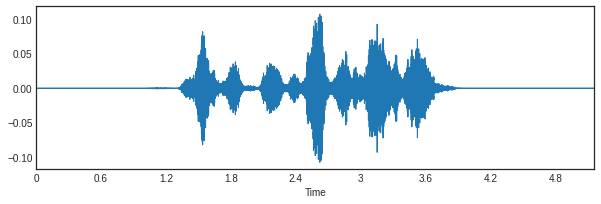

In [22]:
plt.figure(figsize=(10,3))
x = lower_speed(data)
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

# <center> Feature Extraction</center>

As we understand, the data provided from audio cannot be understood by the models directly, so we need to convert them into an understandable format for which feature extraction is used.
The audio signal is a three-dimensional signal in which three axes represent time, amplitude and frequency.


Looking at the waveplots above seems clear (from an eye test) that the waveform itself may not necessarily yield clear class identifying information. Infact they look quite similar.<br/>  
It turns out one of the best tool to feature extract from audio waveforms ( and digital signal in general) is   **Mel Frequency Cepstral Coefficents (MFCCs)**.  

## Mel-Frequency Cepstral Coefficients (MFCCs)
This feature is one of the most important method to extract a feature of an audio signal and is used majorly whenever working on audio signals. The mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10–20) which concisely describe the overall shape of a spectral envelope.

In [23]:
#sample_rate = 22050

def extract_features(data):
    
    result = np.array([])
    
    #mfccs = librosa.feature.mfcc(y=data, sr=22050, n_mfcc=42) #42 mfcc so we get frames of ~60 ms
    mfccs = librosa.feature.mfcc(y=data, sr=22050, n_mfcc=58)
    mfccs_processed = np.mean(mfccs.T,axis=0)
    result = np.array(mfccs_processed)
     
    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=3, offset=0.5, res_type='kaiser_fast') 
    
    #without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    #noised
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically
    
    #stretched
    stretch_data = stretch(data)
    res3 = extract_features(stretch_data)
    result = np.vstack((result, res3))
    
    #shifted
    shift_data = shift(data)
    res4 = extract_features(shift_data)
    result = np.vstack((result, res4))
    
    #pitched
    pitch_data = pitch(data, sample_rate)
    res5 = extract_features(pitch_data)
    result = np.vstack((result, res5)) 
    
    #speed up
    higher_speed_data = higher_speed(data)
    res6 = extract_features(higher_speed_data)
    result = np.vstack((result, res6))
    
    #speed down
    lower_speed_data = higher_speed(data)
    res7 = extract_features(lower_speed_data)
    result = np.vstack((result, res7))
    
    return result

In [24]:
if not DATA_FRAMES:
    
    female_X, female_Y = [], []
    for path, emotion in zip(Females.path, Females.labels):
        features = get_features(path)
        #adding augmentation, get_features return a multi dimensional array (for each augmentation), so we have to use a loop to fill the df
        for elem in features: 
            female_X.append(elem)        
            female_Y.append(emotion)
    

    male_X, male_Y = [], []
    for path, emotion in zip(Males.path, Males.labels):
        features = get_features(path)
        for elem in features:
            male_X.append(elem)
            male_Y.append(emotion)
            
    print(f'Check shapes:\nFemale features: {len(female_X)}, labels: {len(female_Y)}\nMale features:   {len(male_X)}, labels: {len(male_Y)}')

In [25]:
def setup_dataframe(gender, features, labels):
    df = pd.DataFrame(features)
    df['labels'] = labels
    df.to_csv(f'{gender}_features.csv', index=False)
    
    print(f'{gender} dataframe')
    df.sample(frac=1).head()
    
    return df

In [26]:
if not DATA_FRAMES:
    Females_Features = setup_dataframe('Female', female_X, female_Y)
else:
    Females_Features = pd.read_csv(fem_path)

In [27]:
if not DATA_FRAMES:
    Males_Features = setup_dataframe('Male', male_X, male_Y)
else:
    Males_Features = pd.read_csv(mal_path)

# <center>Data Preparation
**Now, it is important to split the data between training and testing**

In [28]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [29]:
female_X = Females_Features.iloc[: ,:-1].values
female_Y = Females_Features['labels'].values

male_X = Males_Features.iloc[: ,:-1].values
male_Y = Males_Features['labels'].values

In [30]:
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()

female_Y = encoder.fit_transform(np.array(female_Y).reshape(-1,1)).toarray()
male_Y = encoder.fit_transform(np.array(male_Y).reshape(-1,1)).toarray()

# <center> Splitting data

Splitting data in this code is a crucial step, as it still shows the difference of emotions between genders even in the audios field.

In [31]:
nogender_X = np.concatenate((female_X, male_X))
nogender_Y = np.concatenate((female_Y, male_Y))

x_train, x_test, y_train, y_test = train_test_split(nogender_X, nogender_Y, random_state=0, test_size=0.20, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((68107, 58), (68107, 8), (17027, 58), (17027, 8))

In [32]:
x_trainF, x_testF, y_trainF, y_testF = train_test_split(female_X, female_Y, random_state=0, test_size=0.20, shuffle=True)
x_trainF.shape, y_trainF.shape, x_testF.shape, y_testF.shape

((39379, 58), (39379, 8), (9845, 58), (9845, 8))

In [33]:
x_trainM, x_testM, y_trainM, y_testM = train_test_split(male_X, male_Y, random_state=0, test_size=0.20, shuffle=True)
x_trainM.shape, y_trainM.shape, x_testM.shape, y_testM.shape

((28728, 58), (28728, 8), (7182, 58), (7182, 8))

In [34]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x_trainF = scaler.fit_transform(x_trainF)
x_testF = scaler.transform(x_testF)

x_trainM = scaler.fit_transform(x_trainM)
x_testM = scaler.transform(x_testM)

# <center> Making our data compatible to model

In [35]:
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape , x_test.shape , y_test.shape

((68107, 58, 1), (68107, 8), (17027, 58, 1), (17027, 8))

In [36]:
x_trainF = np.expand_dims(x_trainF, axis=2)
x_testF = np.expand_dims(x_testF, axis=2)
x_trainF.shape, y_trainF.shape, x_testF.shape, y_testF.shape

((39379, 58, 1), (39379, 8), (9845, 58, 1), (9845, 8))

In [37]:
x_trainM = np.expand_dims(x_trainM, axis=2)
x_testM = np.expand_dims(x_testM, axis=2)
x_trainM.shape, y_trainM.shape, x_testM.shape, y_testM.shape

((28728, 58, 1), (28728, 8), (7182, 58, 1), (7182, 8))

# <center>Modeling<center>
    
The goal of modeling is to build a mathematical representation of the relationships and patterns in the data, which can be used to make predictions or decisions about new data.

In [38]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization, AveragePooling1D
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

In [39]:
## To check if a system has the necessary GPU resources available to train our large models
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [40]:
# Create a MirroredStrategy.
strategy = tf.distribute.MirroredStrategy()
print('Number of devices: {}'.format(strategy.num_replicas_in_sync))

Number of devices: 1


In [41]:
with strategy.scope():
    
    def build_model(in_shape):
        
        model=Sequential()
        model.add(Conv1D(256, kernel_size=6, strides=1, padding='same', activation='relu', input_shape=(in_shape, 1)))
        model.add(AveragePooling1D(pool_size=4, strides = 2, padding = 'same'))

        model.add(Conv1D(128, kernel_size=6, strides=1, padding='same', activation='relu'))
        model.add(AveragePooling1D(pool_size=4, strides = 2, padding = 'same'))

        model.add(Conv1D(128, kernel_size=6, strides=1, padding='same', activation='relu'))
        model.add(AveragePooling1D(pool_size=4, strides = 2, padding = 'same'))
        model.add(Dropout(0.2))

        model.add(Conv1D(64, kernel_size=6, strides=1, padding='same', activation='relu'))
        model.add(MaxPooling1D(pool_size=4, strides = 2, padding = 'same'))
        
        model.add(Flatten())
        model.add(Dense(units=32, activation='relu'))
        model.add(Dropout(0.3))

        model.add(Dense(units=8, activation='softmax'))
        model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
          
        
        return model

In [42]:
def model_build_summary(mod_dim, tr_features, val_features, val_labels):
    model = build_model(mod_dim)
    model.summary()
    
    score = model.evaluate(val_features, val_labels, verbose = 1)
    accuracy = 100*score[1]
    
    return model

*ReduceLROnPlateau* reduce learning rate when a metric has stopped improving.<br>

Models often benefit from reducing the learning rate by a factor of 2-10 once learning stagnates. This callback monitors a quantity and if no improvement is seen for a 'patience' number of epochs, the learning rate is reduced.

In [43]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=4, min_lr=0.000001)

batch_size = 32
n_epochs = 75

In [44]:
def show_graphs(history):
    epochs = [i for i in range(n_epochs)]
    fig , ax = plt.subplots(1,2)
    train_acc = history.history['accuracy']
    train_loss = history.history['loss']
    test_acc = history.history['val_accuracy']
    test_loss = history.history['val_loss']

    fig.set_size_inches(30,12)
    ax[0].plot(epochs , train_loss , label = 'Training Loss')
    ax[0].plot(epochs , test_loss , label = 'Testing Loss')
    ax[0].set_title('Training & Testing Loss')
    ax[0].legend()
    ax[0].set_xlabel("Epochs")

    ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
    ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
    ax[1].set_title('Training & Testing Accuracy')
    ax[1].legend()
    ax[1].set_xlabel("Epochs")
    plt.show()

# <center> Model Summary and Pre-training Accuracy

**Check the layers in our CNN**

In [45]:
total_model = model_build_summary(x_train.shape[1], x_train, x_test, y_test)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 58, 256)           1792      
_________________________________________________________________
average_pooling1d (AveragePo (None, 29, 256)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 29, 128)           196736    
_________________________________________________________________
average_pooling1d_1 (Average (None, 15, 128)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 15, 128)           98432     
_________________________________________________________________
average_pooling1d_2 (Average (None, 8, 128)            0         
_________________________________________________________________
dropout (Dropout)            (None, 8, 128)            0

In [46]:
female_model = model_build_summary(x_trainF.shape[1], x_trainF, x_testF, y_testF)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 58, 256)           1792      
_________________________________________________________________
average_pooling1d_3 (Average (None, 29, 256)           0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 29, 128)           196736    
_________________________________________________________________
average_pooling1d_4 (Average (None, 15, 128)           0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 15, 128)           98432     
_________________________________________________________________
average_pooling1d_5 (Average (None, 8, 128)            0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 8, 128)           

In [47]:
male_model = model_build_summary(x_trainM.shape[1], x_trainM, x_testM, y_testM)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_8 (Conv1D)            (None, 58, 256)           1792      
_________________________________________________________________
average_pooling1d_6 (Average (None, 29, 256)           0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 29, 128)           196736    
_________________________________________________________________
average_pooling1d_7 (Average (None, 15, 128)           0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 15, 128)           98432     
_________________________________________________________________
average_pooling1d_8 (Average (None, 8, 128)            0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 8, 128)           

# <center> Model training

In [48]:
history = total_model.fit(x_train, y_train, batch_size=batch_size, epochs=n_epochs, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/75
2129/2129 [==============================] - 9s 4ms/step - loss: 1.3906 - accuracy: 0.4420 - val_loss: 1.1343 - val_accuracy: 0.5458
Epoch 2/75
2129/2129 [==============================] - 9s 4ms/step - loss: 1.1605 - accuracy: 0.5403 - val_loss: 1.0621 - val_accuracy: 0.5794
Epoch 3/75
2129/2129 [==============================] - 9s 4ms/step - loss: 1.0825 - accuracy: 0.5711 - val_loss: 0.9948 - val_accuracy: 0.6050
Epoch 4/75
2129/2129 [==============================] - 9s 4ms/step - loss: 1.0215 - accuracy: 0.6003 - val_loss: 0.9557 - val_accuracy: 0.6235
Epoch 5/75
2129/2129 [==============================] - 9s 4ms/step - loss: 0.9681 - accuracy: 0.6221 - val_loss: 0.9022 - val_accuracy: 0.6408
Epoch 6/75
2129/2129 [==============================] - 9s 4ms/step - loss: 0.9195 - accuracy: 0.6410 - val_loss: 0.8723 - val_accuracy: 0.6571
Epoch 7/75
2129/2129 [==============================] - 9s 4ms/step - loss: 0.8773 - accuracy: 0.6584 - val_loss: 0.8198 - val_accuracy:

In [49]:
female_history = female_model.fit(x_trainF, y_trainF, batch_size=batch_size, epochs=n_epochs, validation_data=(x_testF, y_testF), callbacks=[rlrp])

Epoch 1/75
1231/1231 [==============================] - 5s 4ms/step - loss: 1.2231 - accuracy: 0.5165 - val_loss: 0.9425 - val_accuracy: 0.6194
Epoch 2/75
1231/1231 [==============================] - 5s 4ms/step - loss: 0.9543 - accuracy: 0.6224 - val_loss: 0.8126 - val_accuracy: 0.6737
Epoch 3/75
1231/1231 [==============================] - 5s 4ms/step - loss: 0.8614 - accuracy: 0.6566 - val_loss: 0.7586 - val_accuracy: 0.6932
Epoch 4/75
1231/1231 [==============================] - 5s 4ms/step - loss: 0.8048 - accuracy: 0.6803 - val_loss: 0.7256 - val_accuracy: 0.7087
Epoch 5/75
1231/1231 [==============================] - 5s 4ms/step - loss: 0.7547 - accuracy: 0.7025 - val_loss: 0.7034 - val_accuracy: 0.7202
Epoch 6/75
1231/1231 [==============================] - 6s 5ms/step - loss: 0.7152 - accuracy: 0.7202 - val_loss: 0.6458 - val_accuracy: 0.7484
Epoch 7/75
1231/1231 [==============================] - 6s 5ms/step - loss: 0.6716 - accuracy: 0.7382 - val_loss: 0.6014 - val_accuracy:

In [50]:
male_history = male_model.fit(x_trainM, y_trainM, batch_size=batch_size, epochs=n_epochs, validation_data=(x_testM, y_testM), callbacks=[rlrp])

Epoch 1/75
898/898 [==============================] - 4s 5ms/step - loss: 1.6901 - accuracy: 0.3144 - val_loss: 1.4799 - val_accuracy: 0.4208
Epoch 2/75
898/898 [==============================] - 4s 4ms/step - loss: 1.4914 - accuracy: 0.4074 - val_loss: 1.3550 - val_accuracy: 0.4664
Epoch 3/75
898/898 [==============================] - 4s 4ms/step - loss: 1.3928 - accuracy: 0.4493 - val_loss: 1.2926 - val_accuracy: 0.4820
Epoch 4/75
898/898 [==============================] - 4s 4ms/step - loss: 1.3245 - accuracy: 0.4754 - val_loss: 1.2339 - val_accuracy: 0.5143
Epoch 5/75
898/898 [==============================] - 4s 4ms/step - loss: 1.2600 - accuracy: 0.5056 - val_loss: 1.1610 - val_accuracy: 0.5430
Epoch 6/75
898/898 [==============================] - 4s 4ms/step - loss: 1.2042 - accuracy: 0.5260 - val_loss: 1.1261 - val_accuracy: 0.5607
Epoch 7/75
898/898 [==============================] - 4s 4ms/step - loss: 1.1459 - accuracy: 0.5502 - val_loss: 1.0401 - val_accuracy: 0.5977
Epoch 

# <center> Layer Testing
The  following two code lines are to see the output of specific layers in both male and female models

In [51]:
from keras import backend as K

layer_name = 'average_pooling1d_7'
intermediate_layer_model = keras.Model(inputs=male_model.input,
                                       outputs=male_model.get_layer(layer_name).output)
intermediate_output = intermediate_layer_model(x_testM)
print(intermediate_output[1,0])


tf.Tensor(
[0.0000000e+00 0.0000000e+00 0.0000000e+00 6.5075582e-01 0.0000000e+00
 1.6343080e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 1.7925788e-01 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 1.1711417e+00 1.5995069e-01 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 1.4749123e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 1.3689455e+00 7.4945289e-01 0.0000000e+00 0.0000000e+00 0.0000000e+00
 5.7315409e-01 0.0000000e+00 1.5955601e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 7.5307435e-01 0.0000000e+00
 0.0000000e+00 0.0000000e+00 9.1651803e-01 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 6.3183904e-03 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 8.7035084e-01 0.0000000e+00
 1.3500476e-03 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000

In [52]:
from keras import backend as K

layer_name = 'conv1d_5'
intermediate_layer_model = keras.Model(inputs=female_model.input,
                                       outputs=female_model.get_layer(layer_name).output)
intermediate_output = intermediate_layer_model(x_testF)
print(intermediate_output[1,0])

tf.Tensor(
[0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        2.6422193
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        1.4591594 0.        0.        0.
 0.4941478 1.8648779 0.        0.        0.        0.        0.5719493
 0.        0.        0.        0.        0.        0.        0.0790444
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        1.1294037 0.        0.
 0.        0.        0.        0.        0.0583811 0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.3361958 0.        0.
 0.        0.        0.        0.        0.        0.907825  0.
 0.        0.        0.3955708 0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.     

# <center> Performance Evaluations
    
This code is  divided into 3 parts. The first part detect information for the mixed audios (males and females). The second is for the Females cluster, and the last one is for the Males.

In [53]:
# genderless
score = total_model.evaluate(x_train,y_train, verbose = 0)
print("Mixed-gender emotions training Accuracy: {0:.2%}".format(score[1]))

score = total_model.evaluate(x_test, y_test, verbose=0)
print("Mixed-gender emotions testing Accuracy: {0:.2%}".format(score[1]))

Mixed-gender emotions training Accuracy: 97.36%
Mixed-gender emotions testing Accuracy: 88.07%


The most important testing part, which takes the audios as input and returns the predictions 

In [54]:
# predicting on test data.
predall_test = total_model.predict(x_test)
y_predall = encoder.inverse_transform(predall_test)
y_testall = encoder.inverse_transform(y_test)
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_predall.flatten()
df['Actual Labels'] = y_testall.flatten()

df.head(15)

Predicted Labels Actual Labels
0           disgust       disgust
1             angry         angry
2             happy         happy
3             angry         angry
4               sad           sad
5           disgust       disgust
6             happy         happy
7               sad           sad
8          surprise      surprise
9           disgust       disgust
10            angry          fear
11              sad           sad
12              sad           sad
13             fear          fear
14          disgust       disgust

In [55]:
print(classification_report(y_testall, y_predall))

              precision    recall  f1-score   support

       angry       0.92      0.92      0.92      2685
        calm       0.86      0.96      0.91       272
     disgust       0.86      0.84      0.85      2690
        fear       0.85      0.88      0.86      2675
       happy       0.88      0.85      0.86      2707
     neutral       0.86      0.88      0.87      2413
         sad       0.88      0.88      0.88      2672
    surprise       0.96      0.95      0.96       913

    accuracy                           0.88     17027
   macro avg       0.89      0.90      0.89     17027
weighted avg       0.88      0.88      0.88     17027



The confusion matrix is a table with two rows and two columns that reports the number of true positives, false positives, true negatives, and false negatives.

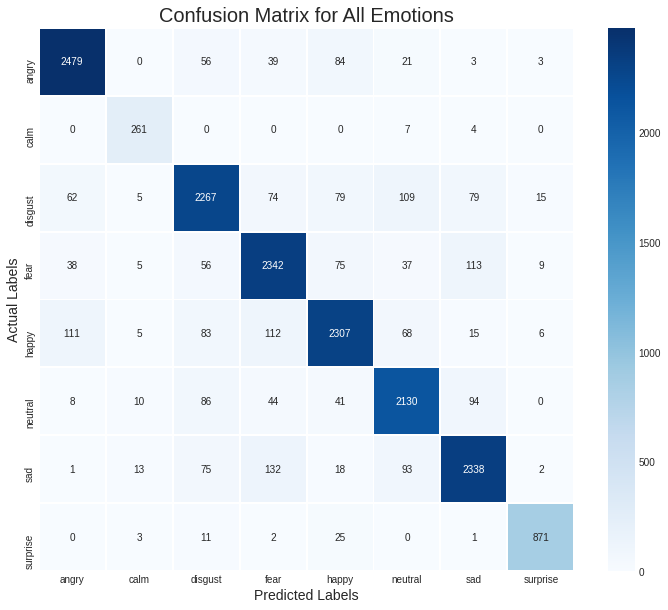

In [56]:
cm = confusion_matrix(y_testall, y_predall)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix for All Emotions', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [57]:
score = female_model.evaluate(x_trainF,y_trainF, verbose = 0)
print("Female emotions training Accuracy: {0:.2%}".format(score[1]))

score = female_model.evaluate(x_testF, y_testF, verbose=0)
print("Female emotions testing Accuracy: {0:.2%}".format(score[1]))

Female emotions training Accuracy: 99.32%
Female emotions testing Accuracy: 93.62%


In [58]:
# predicting on test data.
predF_test = total_model.predict(x_testF)
y_predF = encoder.inverse_transform(predF_test)
y_testF = encoder.inverse_transform(y_testF)
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_predF.flatten()
df['Actual Labels'] = y_testF.flatten()

df.head(15)

Predicted Labels Actual Labels
0             happy         happy
1           neutral       neutral
2           disgust       neutral
3             angry         angry
4             happy       disgust
5           neutral       neutral
6           neutral         happy
7               sad       disgust
8             happy       neutral
9               sad           sad
10            angry         angry
11            happy         happy
12          disgust       disgust
13         surprise      surprise
14              sad           sad

In [59]:
print(classification_report(y_testF, y_predF))

              precision    recall  f1-score   support

       angry       0.92      0.90      0.91      1574
        calm       0.80      0.88      0.84       119
     disgust       0.84      0.83      0.84      1545
        fear       0.89      0.84      0.86      1531
       happy       0.87      0.88      0.87      1531
     neutral       0.86      0.85      0.86      1335
         sad       0.82      0.91      0.86      1527
    surprise       1.00      0.92      0.96       683

    accuracy                           0.87      9845
   macro avg       0.87      0.88      0.87      9845
weighted avg       0.87      0.87      0.87      9845



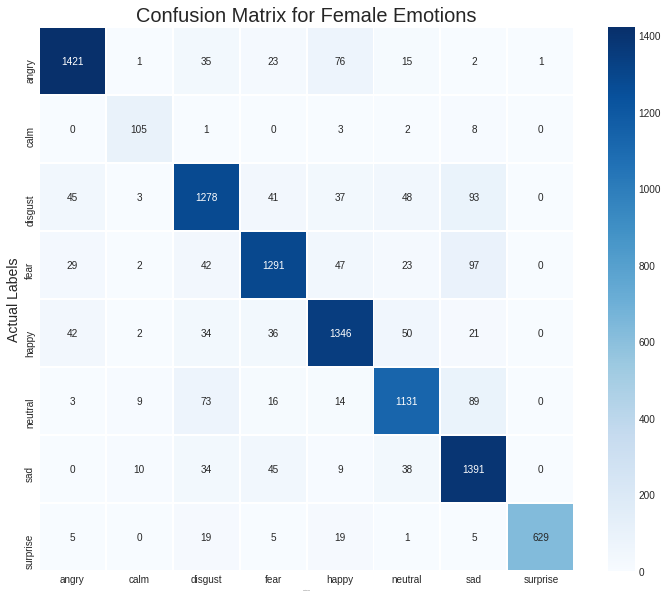

In [60]:
cm = confusion_matrix(y_testF, y_predF)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix for Female Emotions', size=20)
plt.xlabel('Predicted Labels', size=1)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [61]:
score = male_model.evaluate(x_trainM,y_trainM, verbose = 0)
print("Male emotions training Accuracy: {0:.2%}".format(score[1]))

score = male_model.evaluate(x_testM, y_testM, verbose=0)
print("Male emotions testing Accuracy: {0:.2%}".format(score[1]))

Male emotions training Accuracy: 98.34%
Male emotions testing Accuracy: 87.04%


In [62]:
# predicting on test data.
predM_test = total_model.predict(x_testM)
y_predM = encoder.inverse_transform(predM_test)
y_testM = encoder.inverse_transform(y_testM)
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_predM.flatten()
df['Actual Labels'] = y_testM.flatten()

df.head(15)

Predicted Labels Actual Labels
0           disgust         angry
1              fear       neutral
2           disgust           sad
3              fear          fear
4              fear           sad
5               sad           sad
6              fear          fear
7           neutral       neutral
8             happy         happy
9           disgust       disgust
10            angry         angry
11            angry       disgust
12          disgust      surprise
13              sad           sad
14            happy       disgust

In [63]:
print(classification_report(y_testM, y_predM))


              precision    recall  f1-score   support

       angry       0.74      0.62      0.67      1194
        calm       0.58      0.83      0.68       134
     disgust       0.50      0.48      0.49      1139
        fear       0.43      0.59      0.50      1140
       happy       0.48      0.56      0.52      1117
     neutral       0.61      0.45      0.51      1055
         sad       0.57      0.52      0.54      1160
    surprise       0.57      0.45      0.50       243

    accuracy                           0.54      7182
   macro avg       0.56      0.56      0.55      7182
weighted avg       0.56      0.54      0.54      7182



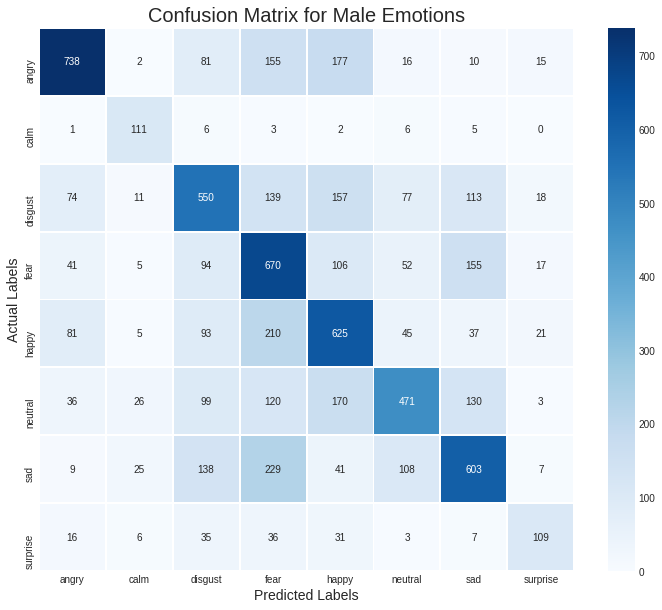

In [64]:
cm = confusion_matrix(y_testM, y_predM)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix for Male Emotions', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

# <center> Training and Validation trends

The following graphs are devided into two parts. One determining the loss in training and testing; While the other is for the Accuracy in training and testing.

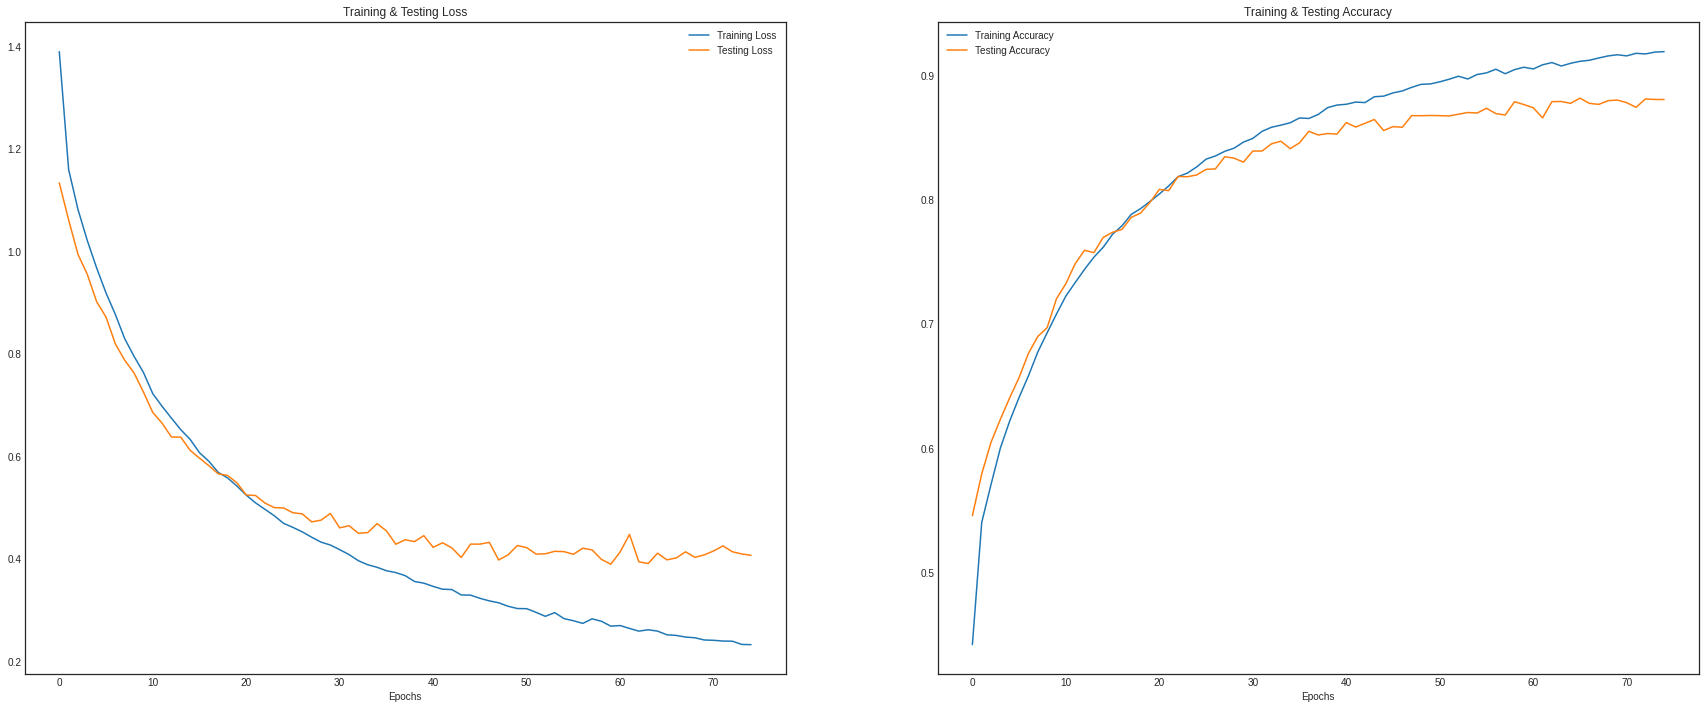

In [65]:
show_graphs(history)

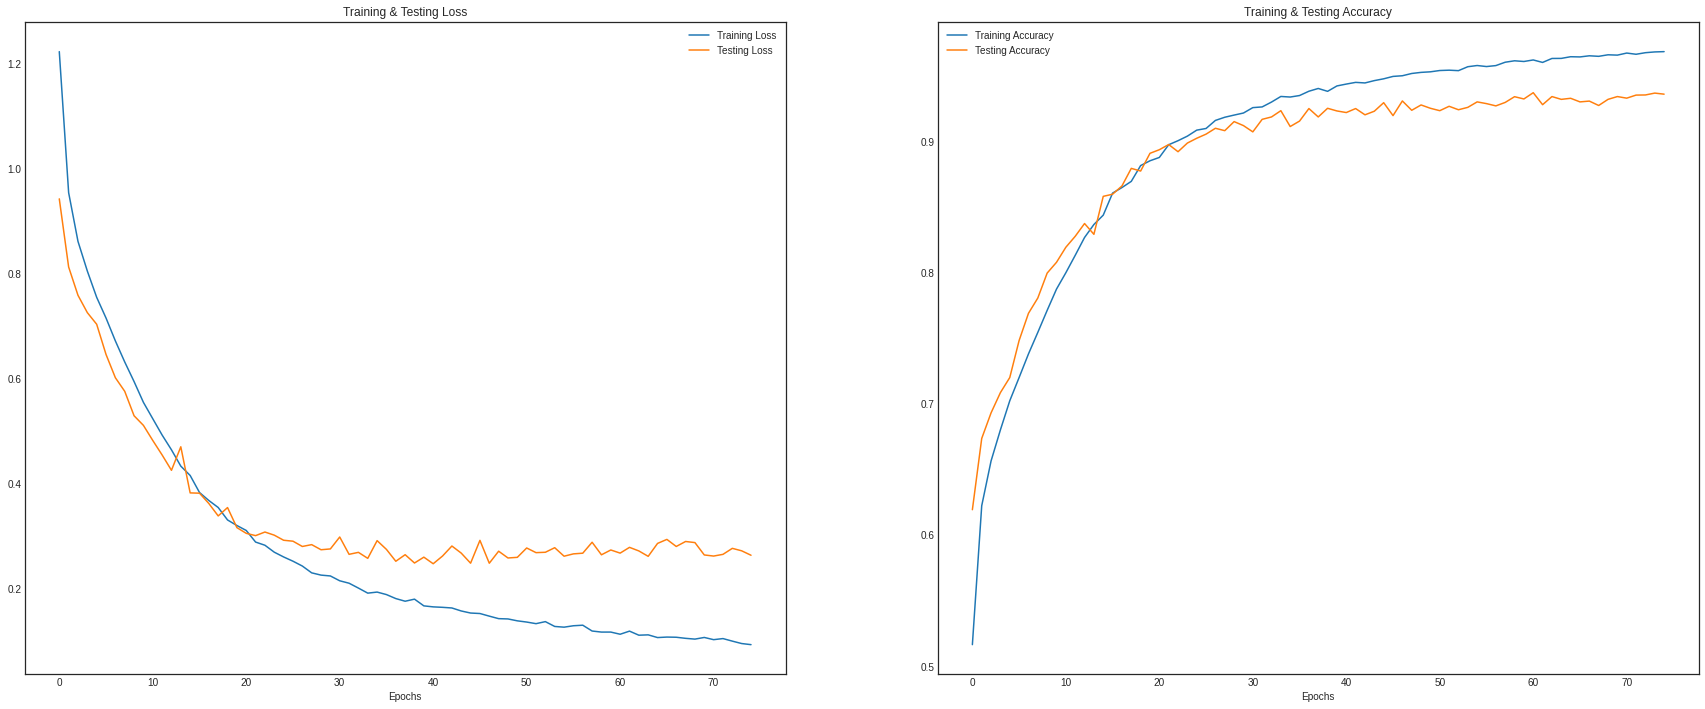

In [66]:
show_graphs(female_history)

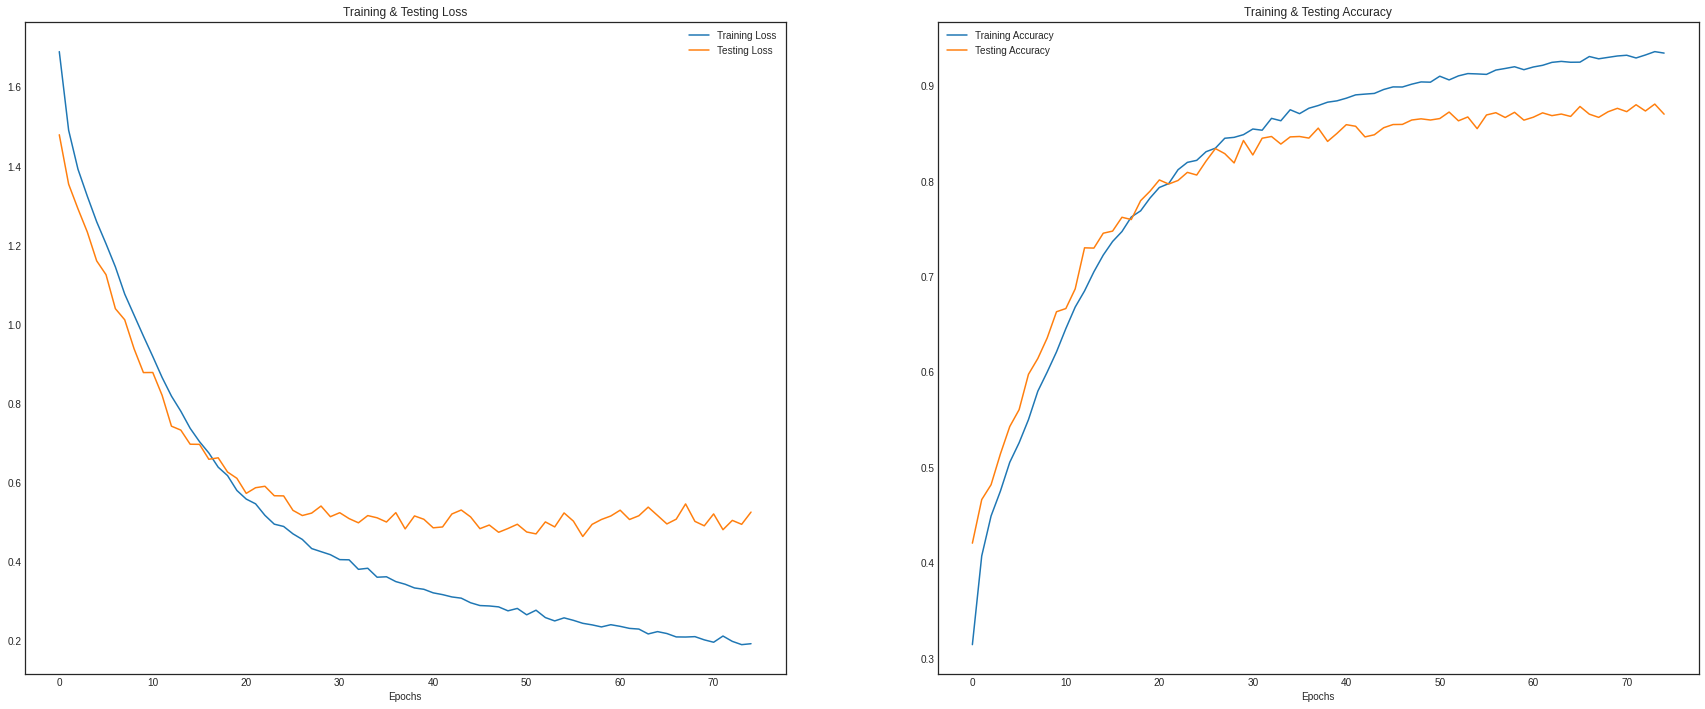

In [67]:
show_graphs(male_history)

**It is really important to develop a model and train it to give a high accurate predictions. In my code I used 6 Datasets among two Data frames. I trained my model to get 85+ accuray in my testing process for female, male and mixed audios.
I hope my code will help others the way I got support from previous codes.**

## Zainab Sb